<a href="https://colab.research.google.com/github/NeenuFrancis/flowers_multiclass_CNN/blob/main/Flower_multiclass_CNN_with_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [1]:
!git clone "https://github.com/NeenuFrancis/flowers_multiclass_CNN.git"

Cloning into 'flowers_multiclass_CNN'...
remote: Enumerating objects: 1148, done.
remote: Counting objects: 100% (477/477), done.
remote: Compressing objects: 100% (459/459), done.
remote: Total 1148 (delta 32), reused 429 (delta 16), pack-reused 671
Receiving objects: 100% (1148/1148), 55.04 MiB | 27.33 MiB/s, done.
Resolving deltas: 100% (57/57), done.


### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [3]:
tf.__version__

'2.14.0'

# **Part 1 - Data Preprocessing**



### Preprocessing the Training set

In [4]:
import pandas as pd

In [5]:
from keras.preprocessing import image
#Creating an object of ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.1)

#Generating batches of Augmented data
training_set = train_datagen.flow_from_directory('/content/flowers_multiclass_CNN/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )

Found 500 images belonging to 5 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)

test_set = test_datagen.flow_from_directory('/content/flowers_multiclass_CNN/data/test',
                                             target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                            )


Found 419 images belonging to 5 classes.


# **Part 2 - Building the CNN**





### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               input_shape=[64, 64, 3]))


### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# **Part 3 - Training the CNN**

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
16/16 [==============================] - 15s 150ms/step - loss: 1.4726 - accuracy: 0.3860 - val_loss: 1.2221 - val_accuracy: 0.4726
Epoch 2/25
16/16 [==============================] - 2s 133ms/step - loss: 1.1907 - accuracy: 0.5220 - val_loss: 0.9750 - val_accuracy: 0.5871
Epoch 3/25
16/16 [==============================] - 2s 136ms/step - loss: 1.0310 - accuracy: 0.6040 - val_loss: 0.9636 - val_accuracy: 0.5943
Epoch 4/25
16/16 [==============================] - 2s 134ms/step - loss: 0.9918 - accuracy: 0.6200 - val_loss: 1.0752 - val_accuracy: 0.5680
Epoch 5/25
16/16 [==============================] - 2s 132ms/step - loss: 0.9178 - accuracy: 0.6300 - val_loss: 0.9917 - val_accuracy: 0.6181
Epoch 6/25
16/16 [==============================] - 3s 182ms/step - loss: 0.9505 - accuracy: 0.6320 - val_loss: 0.9585 - val_accuracy: 0.6158
Epoch 7/25
16/16 [==============================] - 2s 132ms/step - loss: 0.8376 - accuracy: 0.6820 - val_loss: 0.8624 - val_accuracy: 0.6754
Epoch

In [16]:

import numpy as np
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('/content/flowers_multiclass_CNN/Predict_data/dandelion.jpg',
                                     target_size = (64, 64))
#test_image = tf.keras.utils.load_img(test_image)
im=test_image
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

training_set.class_indices


label=["daisy", "dandelion", "rose", "sunflower", "tulip"]
for i in label:
    if result[0][label.index(i)]==1:
         break



prediction=i


im.show()

1/1 [==============================] - 0s 156ms/step


dandelion


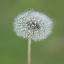

In [17]:
print(prediction)

display(im)